#Alejandro Gonzalez


*Data*


Provided is a dataset of all ‘Bundesliga’ (i.e., the top German football division) matches from the
1993/1994 season to the 2017/2018 season. The dataset contains 10 features:
- Date: the date the match was played
- HomeTeam: the home team
- AwayTeam: the away team
- FTHG: the number of goals the home team scored during the whole match
- FTAG: the number of goals the away team scored during the whole match
- FTR: the full time result, (H)ome, (A)way, or (D)raw
- HTHG: the number of goals the home team scored during the first half
- HTAG: the number of goals the away team scored during the first half
- HTR: the half time result, (H)ome, (A)way, or (D)raw


Note that HTHG, HTAG, and HTR values are missing for the 1993/1994 and 1994/1995 seasons

In [ ]:
#Initial cell, library imports and data directories
from google.colab import drive
drive.mount('/gdrive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.metrics import mean_squared_error, r2_score

DIR_DATA = '/gdrive/MyDrive/Nitor Interview'
os.listdir(DIR_DATA)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


['raw.csv']

# **Question 1**

In [ ]:
#Dataset screening, looking for inconsistencies and understanding the data
bundes_df = pd.DataFrame(pd.read_csv(os.path.join(DIR_DATA, 'raw.csv')))
bundes_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [ ]:
bundes_df.describe()

,FTHG,FTAG,HTHG,HTAG
count,7650.000000,7650.000000,7038.000000,7038.000000
mean,1.660000,1.214771,0.727764,0.523728
std,1.332276,1.158288,0.852518,0.713413
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,9.000000,5.000000,5.000000


In [ ]:
#Addition of current league point system and quick yearly segmentation
bundes_df['H_Points'] = [0 if outcome == 'A' else 3 if outcome == 'H' else 1 for outcome in bundes_df['FTR']]
bundes_df['A_Points'] = [3 if outcome == 'A' else 0 if outcome == 'H' else 1 for outcome in bundes_df['FTR']]
bundes_df['year'] = bundes_df['Date'].str[-4:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,H_Points,A_Points,val,year
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3,0,True,1993
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,0,True,1993
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1,1,True,1993
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0,3,True,1993
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3,0,True,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18,3,0,True,2018
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18,3,0,True,2018
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18,0,3,True,2018
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18,3,0,True,2018


In [ ]:
#Datetime conversion to avoid problems later on
bundes_df['year'] = pd.to_datetime(bundes_df['year'], format='%Y', errors='coerce')

In [ ]:
#Dataset types check
bundes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       7650 non-null   object        
 1   Date      7650 non-null   object        
 2   HomeTeam  7650 non-null   object        
 3   AwayTeam  7650 non-null   object        
 4   FTHG      7650 non-null   int64         
 5   FTAG      7650 non-null   int64         
 6   FTR       7650 non-null   object        
 7   HTHG      7038 non-null   float64       
 8   HTAG      7038 non-null   float64       
 9   HTR       7038 non-null   object        
 10  Season    7650 non-null   object        
 11  H_Points  7650 non-null   int64         
 12  A_Points  7650 non-null   int64         
 13  val       7650 non-null   bool          
 14  year      2933 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 844.3+ KB


In [ ]:
#Fast validation that points system was well implemented
bundes_df['val'] = bundes_df['H_Points'] + bundes_df['A_Points'] <= 3
bundes_df['val'].unique()

array([ True])

In [ ]:
#Dataset division into 2 datasets (one for home and one for away), in order to set apart each team stats
H_performance = bundes_df.groupby('HomeTeam')[['H_Points','FTHG']].sum().reset_index().sort_values(by='H_Points', ascending=False).rename(columns={'HomeTeam': 'Team'})
A_performance = bundes_df.groupby('AwayTeam')['A_Points','FTAG'].sum().reset_index().sort_values(by='A_Points', ascending=False).rename(columns={'AwayTeam': 'Team'})

<ipython-input-156-ea0d43520f39>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  A_performance = bundes_df.groupby('AwayTeam')['A_Points','FTAG'].sum().reset_index().sort_values(by='A_Points', ascending=False).rename(columns={'AwayTeam': 'Team'})


In [ ]:
Total_Performance = pd.merge(H_performance, A_performance, on = 'Team')
Total_Performance['T_Points'] = Total_Performance['H_Points'] + Total_Performance['A_Points']
Total_Performance['TOTH'] = Total_Performance['H_Points']+Total_Performance['A_Points']*1.1+Total_Performance['FTHG']*0.45+Total_Performance['FTHG']*0.50

Team Of The History (TOTH) Metric assigns a weighted sum of the teams performance during history (this case time spam), giving priority to Away Points on Home Points as it assumes its harder for a team to win as visitant because of factors like (Visitor Stadium, Travel Consequences, envirorment, etc...)

The metric is based on the current league point system, assigning 3 points per win, 1 point per draw and 0 per loss

As well the metric ponderates the goals scored by giving them half the value of the points (arbitrary decision triguered by the resemblance size of the figures, Home points vs home goals and away points vs away goals)

Metric formula:

TOTH = *Home Points + Away Points x A_coeff + Home Goals x HG_coeff + Away Goals x AG_coeff*

In the best case scenario:
AG_coef and HG_coef = historic goal distributions
A_coeff = away/home win ratio + penalty

In this case coeffs were subjective due to time constraints


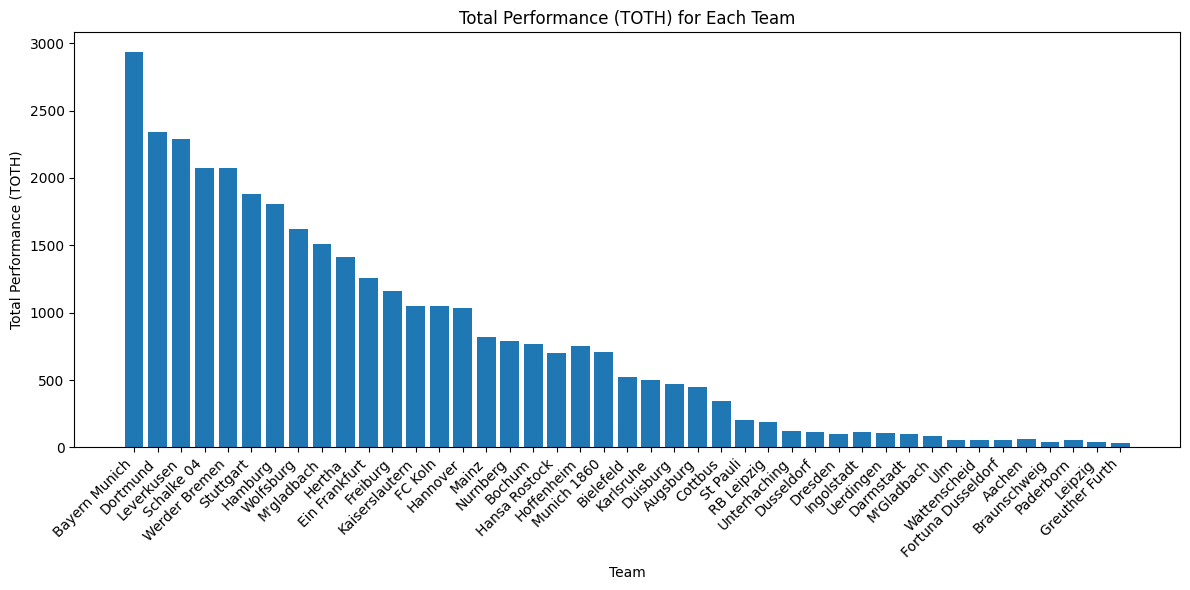

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(Total_Performance['Team'], Total_Performance['TOTH'])
plt.xlabel('Team')
plt.ylabel('Total Performance (TOTH)')
plt.title('Total Performance (TOTH) for Each Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

It is possible then to evidentiate by the metric that the historic best ten teams where:

In [ ]:
Total_Performance.head(10)

,Team,H_Points,FTHG,A_Points,FTAG,T_Points,TOTH
0,Bayern Munich,1032,1090,788,751,1820,2934.30
1,Dortmund,874,854,598,651,1472,2343.10
2,Leverkusen,806,854,609,660,1415,2287.20
3,Schalke 04,792,720,541,514,1333,2071.10
4,Werder Bremen,756,795,514,623,1270,2076.65
5,Stuttgart,703,689,473,545,1176,1877.85
6,Hamburg,699,646,449,497,1148,1806.60
7,Wolfsburg,612,630,373,435,985,1620.80
8,M'gladbach,602,589,318,389,920,1511.35
9,Hertha,550,509,345,367,895,1413.05


In [ ]:
#Same as before but yearly
yearly_H_performance = bundes_df.groupby(['year', 'HomeTeam'])[['H_Points', 'FTHG']].sum().reset_index().sort_values(by=['year', 'H_Points'], ascending=[True, False]).rename(columns={'HomeTeam': 'Team'})
yearly_A_performance = bundes_df.groupby(['year', 'AwayTeam'])[['A_Points', 'FTAG']].sum().reset_index().sort_values(by=['year', 'A_Points'], ascending=[True, False]).rename(columns={'AwayTeam': 'Team'})

,year,Team,H_Points,FTHG
7,1993-01-01,Hamburg,13,13
4,1993-01-01,Ein Frankfurt,12,10
17,1993-01-01,Werder Bremen,12,12
8,1993-01-01,Kaiserslautern,11,13
12,1993-01-01,M'Gladbach,11,14
...,...,...,...,...
533,2018-01-01,Wolfsburg,4,6
516,2018-01-01,Augsburg,3,5
524,2018-01-01,Hertha,2,3
520,2018-01-01,FC Koln,1,6


In [ ]:
y_Total_Performance = pd.merge(yearly_H_performance, yearly_A_performance, on = ['Team','year'])
y_Total_Performance['T_Points'] = y_Total_Performance['H_Points'] + y_Total_Performance['A_Points']
y_Total_Performance['TOTH'] = y_Total_Performance['H_Points']+y_Total_Performance['A_Points']*1.1+y_Total_Performance['FTHG']*0.45+y_Total_Performance['FTHG']*0.50

<ipython-input-92-5075f8bc443b>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(team_data['year'], team_data['TOTH'], 'o-', linestyle='dotted', label=team)


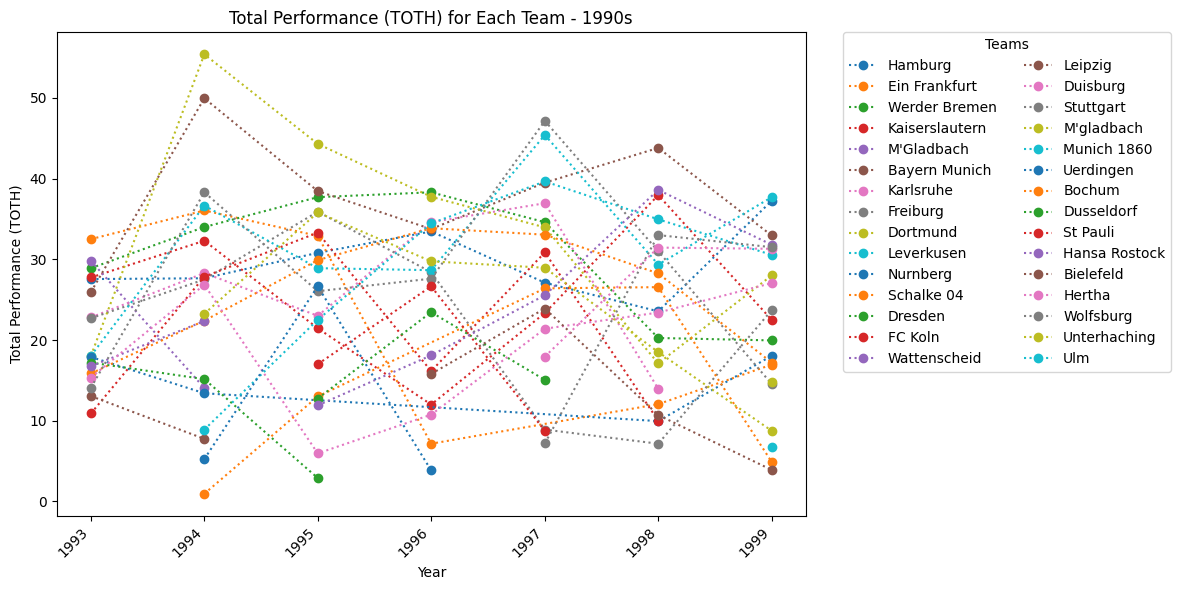

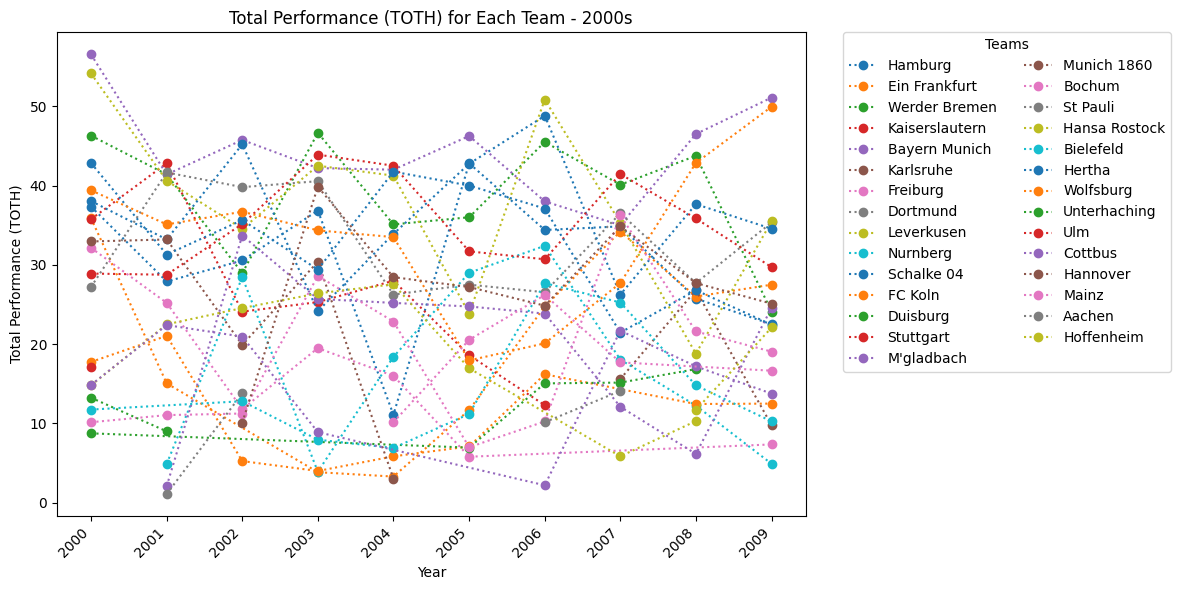

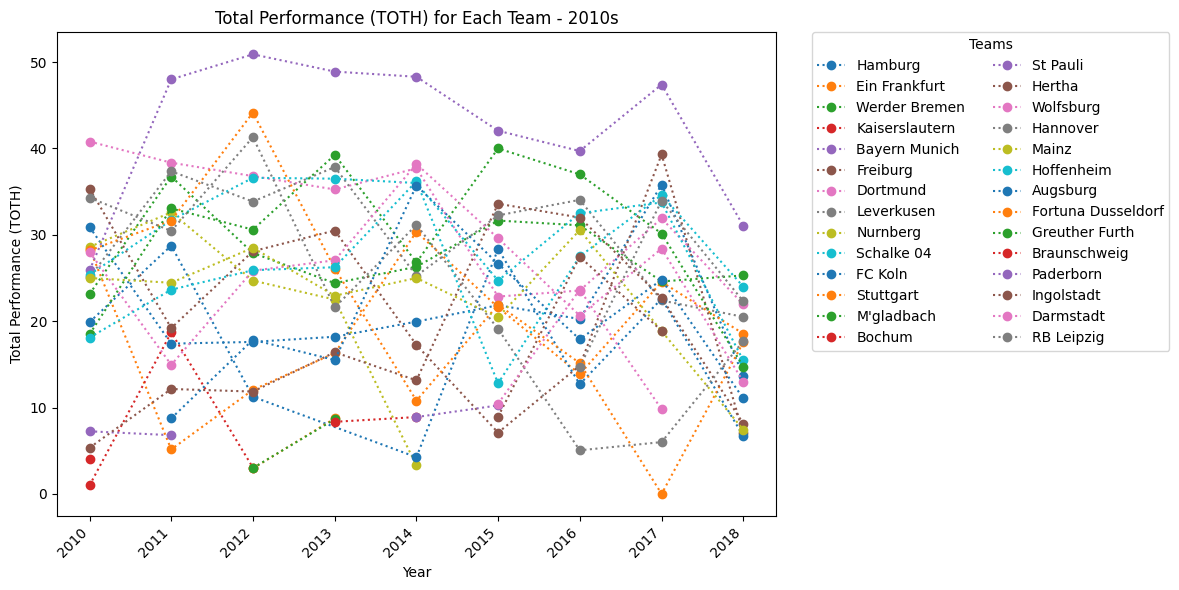

In [ ]:
#3 plots one for each decade for better visualization
teams = y_Total_Performance['Team'].unique()
decades = y_Total_Performance['year'].dt.year // 10 * 10
unique_decades = sorted(decades.unique())

# Plot for each decade
for i, decade in enumerate(unique_decades):
    plt.figure(figsize=(12, 6))

    for team in teams:
        team_data = y_Total_Performance[(y_Total_Performance['Team'] == team) & (decades == decade)]
        if not team_data.empty:
            plt.plot(team_data['year'], team_data['TOTH'], 'o-', linestyle='dotted', label=team)

    plt.xlabel('Year')
    plt.ylabel('Total Performance (TOTH)')
    plt.title(f'Total Performance (TOTH) for Each Team - {decade}s')

    if len(teams) > 10:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, borderaxespad=0., title='Teams')
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Teams')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if i < len(unique_decades) - 1:
        plt.savefig(f'total_performance_{decade}s.png', bbox_inches='tight', dpi=300)
    else:
        plt.show()


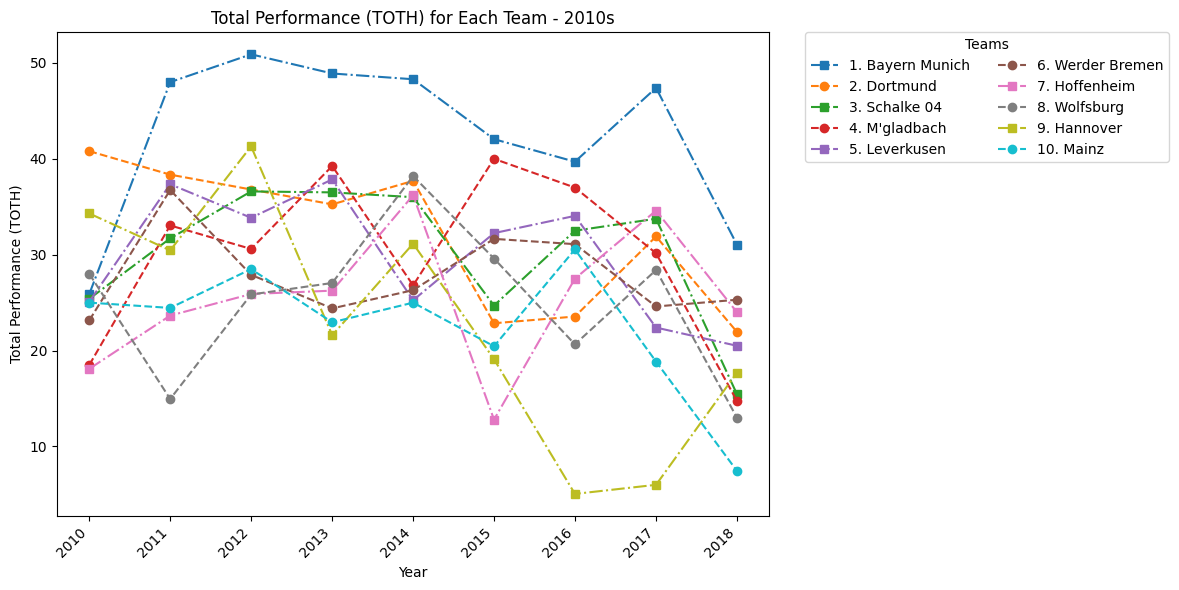

In [ ]:
#Same Plot but for the top 10 teams

y_Total_Performance = y_Total_Performance[y_Total_Performance['year'] > '2009']
top_10_teams = y_Total_Performance.groupby('Team')['TOTH'].sum().nlargest(10).index
y_Total_Performance_top_10 = y_Total_Performance[y_Total_Performance['Team'].isin(top_10_teams)]
decades = y_Total_Performance_top_10['year'].dt.year // 10 * 10
unique_decades = sorted(decades.unique())

# Plot for each decade
for i, decade in enumerate(unique_decades):
    plt.figure(figsize=(12, 6))

    for team_num, team in enumerate(top_10_teams, start=1):
        team_data = y_Total_Performance_top_10[(y_Total_Performance_top_10['Team'] == team) & (decades == decade)]
        if not team_data.empty:
            linestyle = '--' if team_num % 2 == 0 else '-.'  # Alternate line styles
            marker = 'o' if team_num % 2 == 0 else 's'  # Alternate markers
            plt.plot(team_data['year'], team_data['TOTH'], linestyle=linestyle, marker=marker, label=f'{team_num}. {team}')

    plt.xlabel('Year')
    plt.ylabel('Total Performance (TOTH)')
    plt.title(f'Total Performance (TOTH) for Each Team - {decade}s')

    #legends
    if len(top_10_teams) > 5:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, borderaxespad=0., title='Teams')
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Teams')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if i < len(unique_decades) - 1:
        plt.savefig(f'total_performance_{decade}s.png', bbox_inches='tight', dpi=300)
    else:
        plt.show()


Important Note: Data is segmented yearly to counter the fact of season change, enlapsint the second part of previous season and first part of following season

# **Question 2**

In [ ]:
#Model is going to be a simple linear regression, using team names as labels
#Data preparation by creating necessary columns

H_model = bundes_df.groupby(['year', 'HomeTeam'])[['H_Points', 'FTHG','HTHG']].sum().reset_index().sort_values(by=['year', 'H_Points'], ascending=[True, False]).rename(columns={'HomeTeam': 'Team'})
A_model = bundes_df.groupby(['year', 'AwayTeam'])[['A_Points', 'FTAG','HTAG']].sum().reset_index().sort_values(by=['year', 'A_Points'], ascending=[True, False]).rename(columns={'AwayTeam': 'Team'})

H_model['H_goals@2part'] = H_model['FTHG']-H_model['HTHG']
A_model['A_goals@2part'] = A_model['FTAG']-A_model['HTAG']

,year,Team,H_Points,FTHG,HTHG,H_goals@2part
7,1993-01-01,Hamburg,13,13,0.0,13.0
4,1993-01-01,Ein Frankfurt,12,10,0.0,10.0
17,1993-01-01,Werder Bremen,12,12,0.0,12.0
8,1993-01-01,Kaiserslautern,11,13,0.0,13.0
12,1993-01-01,M'Gladbach,11,14,0.0,14.0
...,...,...,...,...,...,...
533,2018-01-01,Wolfsburg,4,6,2.0,4.0
516,2018-01-01,Augsburg,3,5,3.0,2.0
524,2018-01-01,Hertha,2,3,1.0,2.0
520,2018-01-01,FC Koln,1,6,3.0,3.0


In [ ]:
#Finalizing data preparation

model_data = pd.merge(H_model, A_model, on = ['Team','year'])
model_data['total_points'] = model_data['H_Points'] + model_data['A_Points']
model_data['goals@2part'] = model_data['H_goals@2part'] + model_data['A_goals@2part']
model_data['TOTH'] = model_data['H_Points']+model_data['A_Points']*1.1+model_data['FTHG']*0.45+model_data['FTHG']*0.50

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
#MSE model, where target encoders where used as a way to predict teamwise
model_data['half_time_goals'] = model_data['HTHG']+model_data['HTAG']
model_data = model_data[['Team','half_time_goals','total_points','goals@2part']]

X = model_data.drop(columns=['goals@2part'])
y = model_data['goals@2part']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = ce.TargetEncoder(cols=['Team'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

model = LinearRegression()
model.fit(X_train_encoded, y_train)

predictions = model.predict(X_test_encoded)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Team': X_test['Team']})

print(results_df.head(20))

     Actual  Predicted            Team
6      17.0  11.463496       Karlsruhe
489     8.0   8.688037       Darmstadt
104    11.0  12.333989  Kaiserslautern
487    11.0  10.619313        Dortmund
448     6.0   7.940725        Freiburg
222    10.0   8.878448        Hannover
237    12.0   7.694934   Hansa Rostock
433    12.0   7.298902         Hamburg
347     3.0   4.245209         Cottbus
72     13.0  13.627000       Karlsruhe
473     5.0   6.803111       Paderborn
274    11.0  16.101354       Stuttgart
73      6.0   7.323294       Bielefeld
438     9.0   5.205586      Hoffenheim
70      8.0  14.347021      Schalke 04
245     6.0   6.590773           Mainz
228    17.0  14.749734      Leverkusen
10     12.0   8.363814        Nurnberg
349     3.0   5.226115       Karlsruhe
362     8.0   6.117031         FC Koln


In [ ]:
#Some performance metrics

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

tolerance = 1.49
within_tolerance = sum(abs(predictions - y_test) <= tolerance)
percentage_within_tolerance = (within_tolerance / len(y_test)) * 100
print(f'Percentage of predictions within ±{tolerance} goal(s): {percentage_within_tolerance:.2f}%')

Mean Squared Error (MSE): 7.608495039533944
R-squared: 0.7069402718740148
Percentage of predictions within ±1.49 goal(s): 42.06%


The model presented is just a quick first approach, there are multiple angles in which I would like to improve it with more time and a little bit of research on certain specific parts, but for now it takes the yearly historical stats for the teams (its done yearly with the idea of having a regular understanding of teams behavior, reducing volatility, but as a trade-off the model looses significant amount of data) and then predicts the amount goals in the second part using the half time goals, and the points scored (for practice purpose it would be the points of previous years)

The MSE approach was the easiest and fastest for me to develop in the time frame but in practice I would try other approahces (mostly suppervised learning) and different dataset configurations for them, i.e. seasonal data, budget per team, main players injuries, etc...

# **Extra code (decided not to be used in final submitted version)**

In [ ]:
bundes_df.info() #Initial dataset state (if to be ran again, it will show a different output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7650 non-null   object 
 1   Date      7650 non-null   object 
 2   HomeTeam  7650 non-null   object 
 3   AwayTeam  7650 non-null   object 
 4   FTHG      7650 non-null   int64  
 5   FTAG      7650 non-null   int64  
 6   FTR       7650 non-null   object 
 7   HTHG      7038 non-null   float64
 8   HTAG      7038 non-null   float64
 9   HTR       7038 non-null   object 
 10  Season    7650 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 657.5+ KB


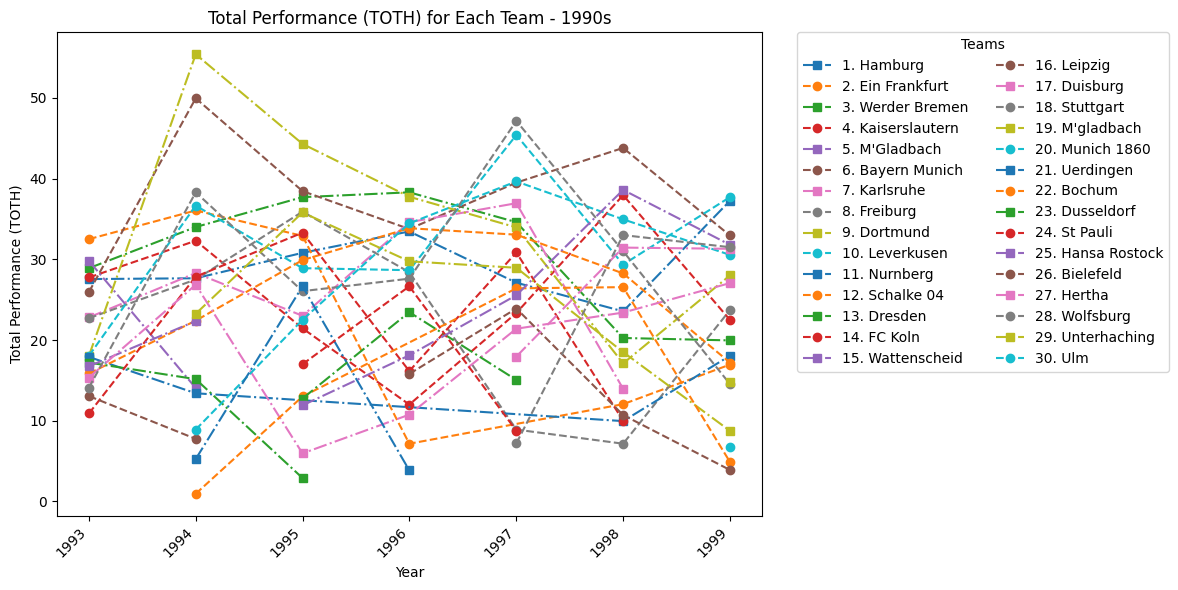

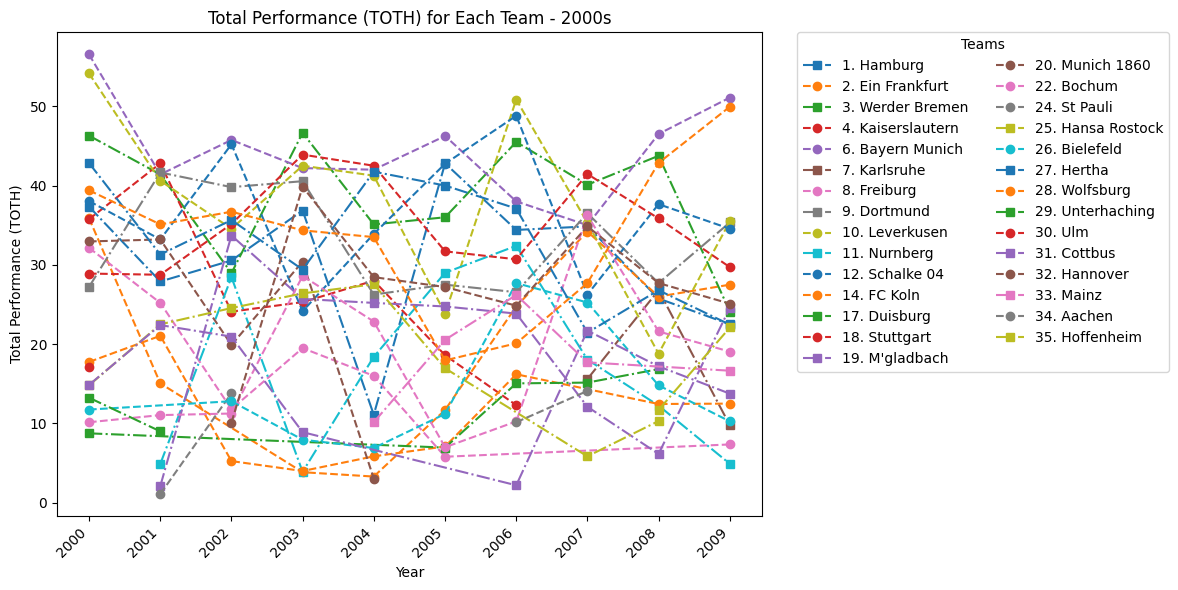

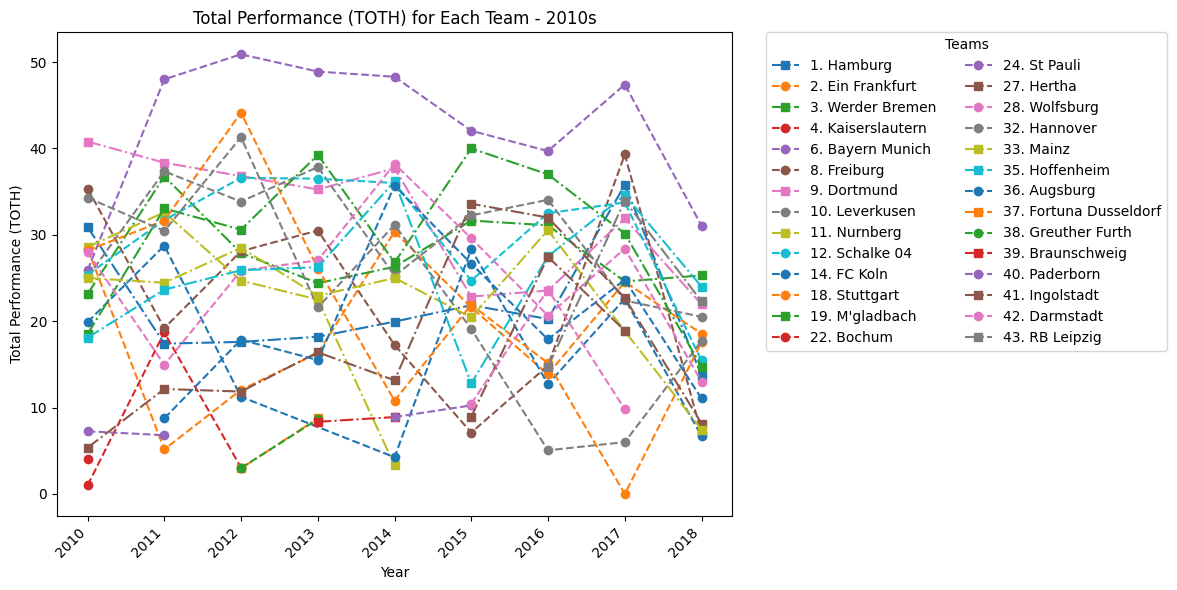

In [ ]:
teams = y_Total_Performance['Team'].unique()

decades = y_Total_Performance['year'].dt.year // 10 * 10
unique_decades = sorted(decades.unique())

# Plot for each decade
for i, decade in enumerate(unique_decades):
    plt.figure(figsize=(12, 6))

    for team_num, team in enumerate(teams, start=1):
        team_data = y_Total_Performance[(y_Total_Performance['Team'] == team) & (decades == decade)]
        if not team_data.empty:
            linestyle = '--' if team_num % 2 == 0 else '-.'  # Alternate line styles
            marker = 'o' if team_num % 2 == 0 else 's'  # Alternate markers
            plt.plot(team_data['year'], team_data['TOTH'], linestyle=linestyle, marker=marker, label=f'{team_num}. {team}')

    plt.xlabel('Year')
    plt.ylabel('Total Performance (TOTH)')
    plt.title(f'Total Performance (TOTH) for Each Team - {decade}s')

    if len(teams) > 10:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, borderaxespad=0., title='Teams')
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Teams')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if i < len(unique_decades) - 1:
        plt.savefig(f'total_performance_{decade}s.png', bbox_inches='tight', dpi=300)
    else:
        plt.show()
